# Customer segmentation 

## This work is about clustering customers at a mall, using k-means clustering method

- Dataset and code are based on "The AI Engineers" program with modifications
- Dataset: Mall_Customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#load the dataset
customer_data = pd.read_csv(r"C:\........\Mall_Customers.csv")

#read the data
customer_data.head()


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#check for null or missing values
customer_data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

### Let’s look at the data and see how it is distributed:

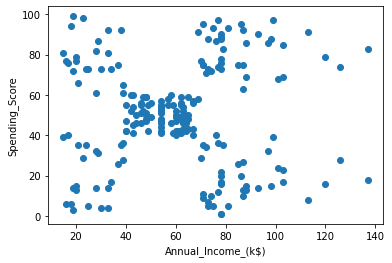

In [4]:
plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

In [5]:
#Evertime we run we will have different centroids BECAUSE WE ARE using The sample function which provides random values
K=3
centroids = customer_data.sample(n=K) #get random k centroids
centroids

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
52,53,Female,31,43,54
45,46,Female,24,39,65
183,184,Female,29,98,88


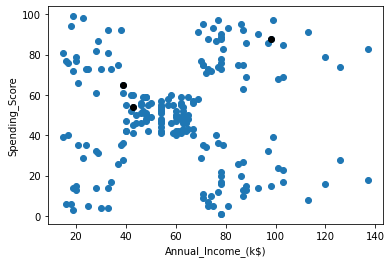

In [6]:
#plotting centroids on the same scatter plot

plt.scatter(customer_data['Annual_Income_(k$)'],customer_data['Spending_Score'])
plt.scatter(centroids['Annual_Income_(k$)'], centroids['Spending_Score'], c='black')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

#### Values of Genre


In [7]:
customer_data["Genre"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

Transofrming Male and Female into numerical variables: 0 and 1 

#### One hot encoding:
Convert categorical variable into dummy/indicator variables.
![One Hot Encodin](onehotencodingviz.jpg)

In [8]:
#one hot encoding to remove Genre values from strings to nuemarical 
customer_data = pd.get_dummies(customer_data, columns=['Genre'] , drop_first=True)


In [9]:
customer_data.head(5)

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


# Clustering - using SciKit Learn


Measuring the smallest distance between each data point and the centroid 

In [19]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [20]:
from sklearn.cluster import KMeans 
km_sample = KMeans(n_clusters=3 )
km_sample.fit(customer_data[['Annual_Income_(k$)','Spending_Score']])



KMeans(n_clusters=3)

In [21]:
X = customer_data

<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

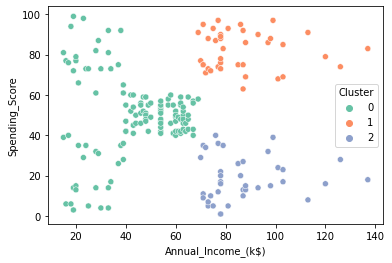

In [22]:
import seaborn as sns 
labels_sample = km_sample.labels_ 
customer_data['Cluster'] = labels_sample
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', data=X, palette='Set2')


### Choosing K


## Elbow method

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


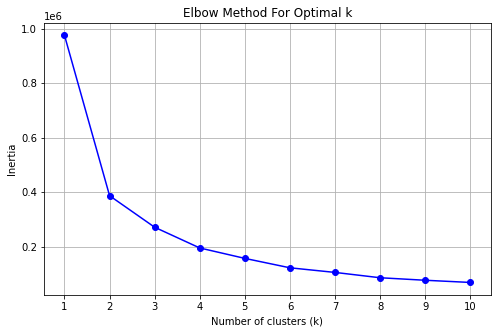

In [23]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your features DataFrame or NumPy array
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')    #distortion
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

K=3

# Silhouette method

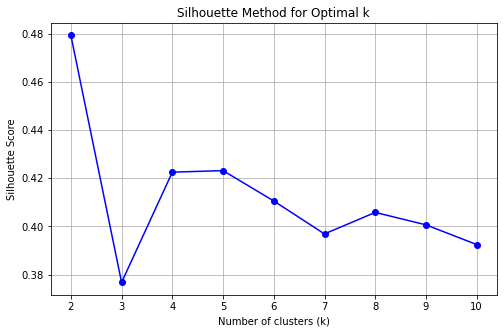

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Example: assuming X is your data (can be scaled or 2 features)
silhouette_scores = []
K = range(2, 11)  # Start from 2 because silhouette is not defined for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

K = 2